In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [54]:
cats_df = pd.read_csv('cats.csv')
dogs_df = pd.read_csv('dogs.csv')

posts = pd.concat([cats_df, dogs_df])

posts

,input.hashtag,input.max_id,data.hashtag.edge_hashtag_to_media.edges.node.comments_disabled,data.hashtag.edge_hashtag_to_media.edges.node.__typename,data.hashtag.edge_hashtag_to_media.edges.node.id,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text,data.hashtag.edge_hashtag_to_media.edges.node.shortcode,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_comment.count,data.hashtag.edge_hashtag_to_media.edges.node.taken_at_timestamp,data.hashtag.edge_hashtag_to_media.edges.node.dimensions.height,...,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_preview_like.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.owner.id,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_src,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].src,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].config_width,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].config_height,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.is_video,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.accessibility_caption,data.hashtag.edge_hashtag_to_content_advisory.count,status
0,catsofinstagram,NaN,False,GraphImage,2156123578830914545,LLEGARON LAS CURIOSIDADES GATUNAS! 🐱\n\n#insta...,B3sFvioD4Px,0,1571249981,1080,...,881,7971487985,https://scontent-lga3-1.cdninstagram.com/vp/c8...,https://scontent-lga3-1.cdninstagram.com/vp/51...,150,150,False,Image may contain: cat,0,ok
1,catsofinstagram,NaN,False,GraphImage,2156123557432816525,Dormire nella posizione stretching 😁 #cats #ca...,B3sFvOsonON,0,1571249979,1350,...,881,7971487985,https://scontent-lga3-1.cdninstagram.com/vp/c8...,https://scontent-lga3-1.cdninstagram.com/vp/51...,150,150,False,Image may contain: cat,0,ok
2,catsofinstagram,NaN,False,GraphImage,2156123563112265301,#cats_of_the_world #catoftheday #cleaneating #...,B3sFvT_J_ZV,0,1571249979,480,...,881,7971487985,https://scontent-lga3-1.cdninstagram.com/vp/c8...,https://scontent-lga3-1.cdninstagram.com/vp/51...,150,150,False,Image may contain: cat,0,ok
3,catsofinstagram,NaN,False,GraphVideo,2156120559727962200,FOLLOW @mrwhiskercurls .. AND Watch me try to ...,B3sFDm3gGhY,0,1571249979,640,...,881,7971487985,https://scontent-lga3-1.cdninstagram.com/vp/c8...,https://scontent-lga3-1.cdninstagram.com/vp/51...,150,150,False,Image may contain: cat,0,ok
4,catsofinstagram,NaN,False,GraphImage,2156123560436035817,Bienvenido a casa Kiro 😭😍 #babycat #cat #catso...,B3sFvRfo_Dp,0,1571249979,720,...,881,7971487985,https://scontent-lga3-1.cdninstagram.com/vp/c8...,https://scontent-lga3-1.cdninstagram.com/vp/51...,150,150,False,Image may contain: cat,0,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66218,dogsofinstagram,QVFEZzBFMjRfR04tS0hWRFpMWEVSWVRKdDExMVlyaGxIM0...,False,GraphVideo,2155659006706826006,"Guten Morgen Ihr Lieben,\n-\nGestern Abend ver...",B3qcHIHobsW,1,1571194637,750,...,9199,5918399326,https://scontent-lga3-1.cdninstagram.com/vp/b3...,https://scontent-lga3-1.cdninstagram.com/vp/c6...,150,150,False,Image may contain: dog,0,ok
66219,dogsofinstagram,QVFEZzBFMjRfR04tS0hWRFpMWEVSWVRKdDExMVlyaGxIM0...,False,GraphImage,2155659079895382237,Oh haiiiii 😄\n#dalenguyentheaussie #australian...,B3qcIMSAnjd,1,1571194609,1080,...,9199,5918399326,https://scontent-lga3-1.cdninstagram.com/vp/b3...,https://scontent-lga3-1.cdninstagram.com/vp/c6...,150,150,False,Image may contain: dog,0,ok
66220,dogsofinstagram,QVFEZzBFMjRfR04tS0hWRFpMWEVSWVRKdDExMVlyaGxIM0...,False,GraphSidecar,2155659074779494329,Crazy boi! .\n.\n#goldenretriever #goldenretri...,B3qcIHhFDe5,2,1571194608,1079,...,9199,5918399326,https://scontent-lga3-1.cdninstagram.com/vp/b3...,https://scontent-lga3-1.cdninstagram.com/vp/c6...,150,150,False,Image may contain: dog,0,ok
66221,dogsofinstagram,QVFEZzBFMjRfR04tS0hWRFpMWEVSWVRKdDExMVlyaGxIM0...,False,GraphImage,2155659013694275022,I love cuddles ☺️\n.\n.\n. . \n#dog

In [55]:
posts['posted_datetime'] = pd.to_datetime(
    posts['data.hashtag.edge_hashtag_to_media.edges.node.taken_at_timestamp'],
    unit='s',
)
posts['posted_datetime_minute'] = posts['posted_datetime'].dt.round('min')

posts['posted_datetime']

0       2019-10-16 18:19:41
1       2019-10-16 18:19:39
2       2019-10-16 18:19:39
3       2019-10-16 18:19:39
4       2019-10-16 18:19:39
                ...        
66218   2019-10-16 02:57:17
66219   2019-10-16 02:56:49
66220   2019-10-16 02:56:48
66221   2019-10-16 02:56:41
66222   2019-10-03 17:02:39
Name: posted_datetime, Length: 133291, dtype: datetime64[ns]

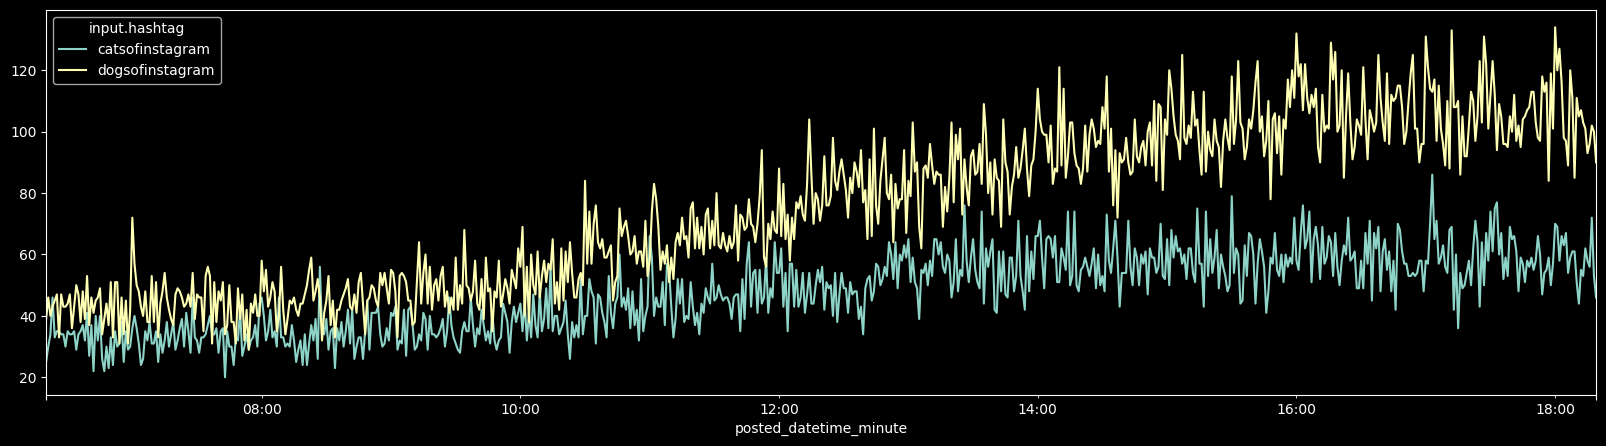

In [56]:
minute_plot = posts \
    .groupby('input.hashtag')['posted_datetime_minute'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(kind='line', figsize=(20,5))

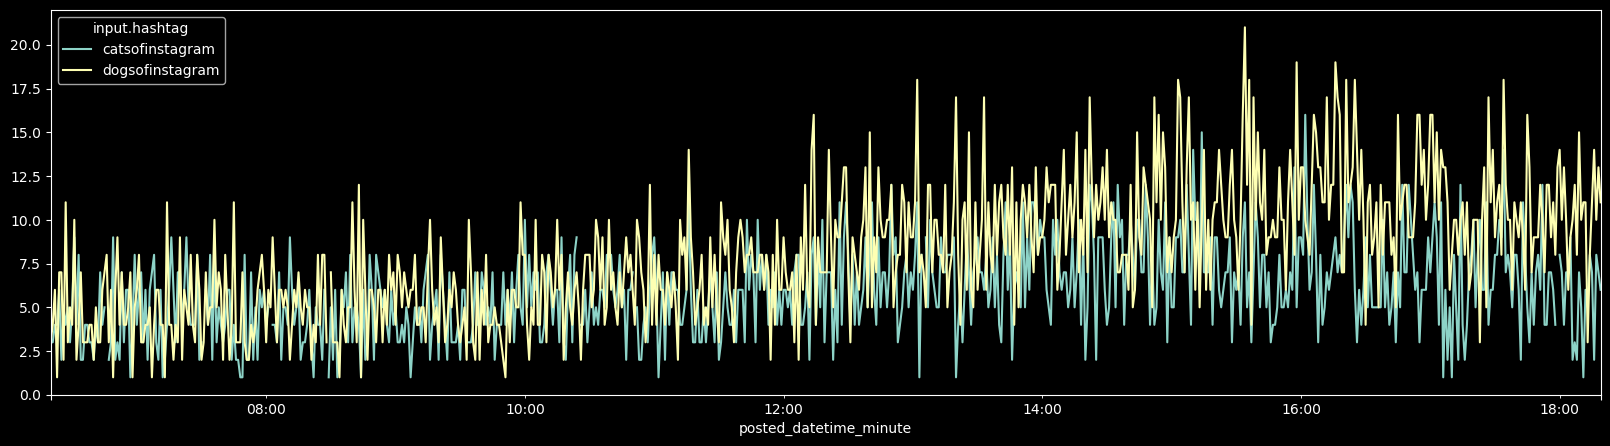

In [57]:
video_posts = posts.loc[posts['data.hashtag.edge_hashtag_to_media.edges.node.is_video'] == True]
image_posts = posts.loc[posts['data.hashtag.edge_hashtag_to_media.edges.node.is_video'] == False]

video_posts \
    .groupby('input.hashtag')['posted_datetime_minute'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(kind='line', figsize=(20,5))


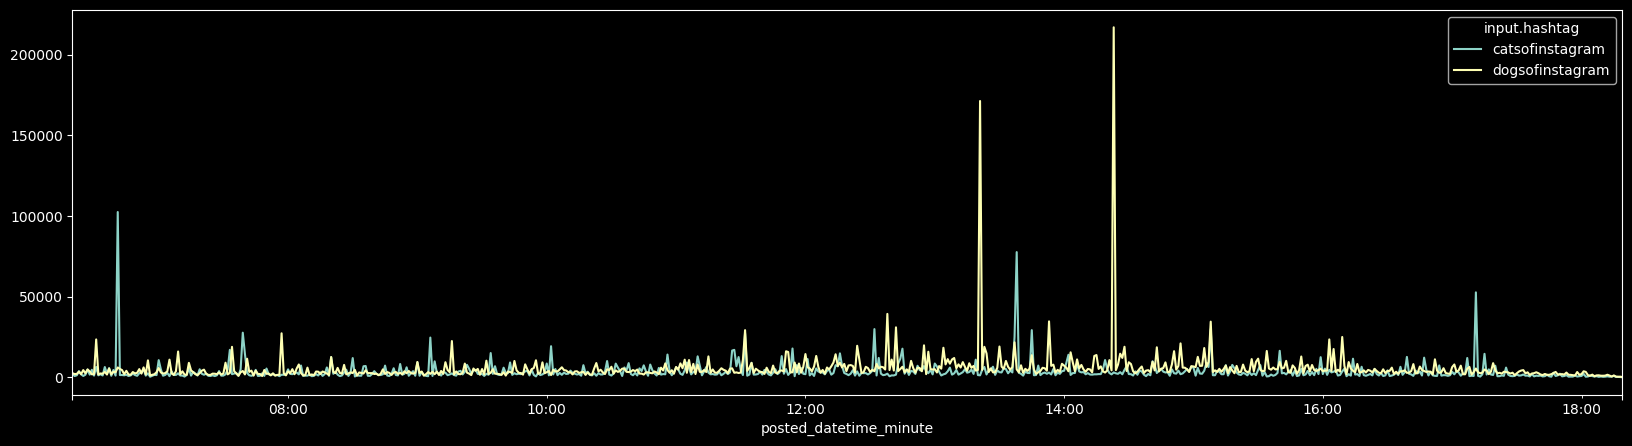

In [58]:
posts \
    .groupby(['input.hashtag', 'posted_datetime_minute']) \
        ['data.hashtag.edge_hashtag_to_media.edges.node.edge_liked_by.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(kind='line', figsize=(20,5))

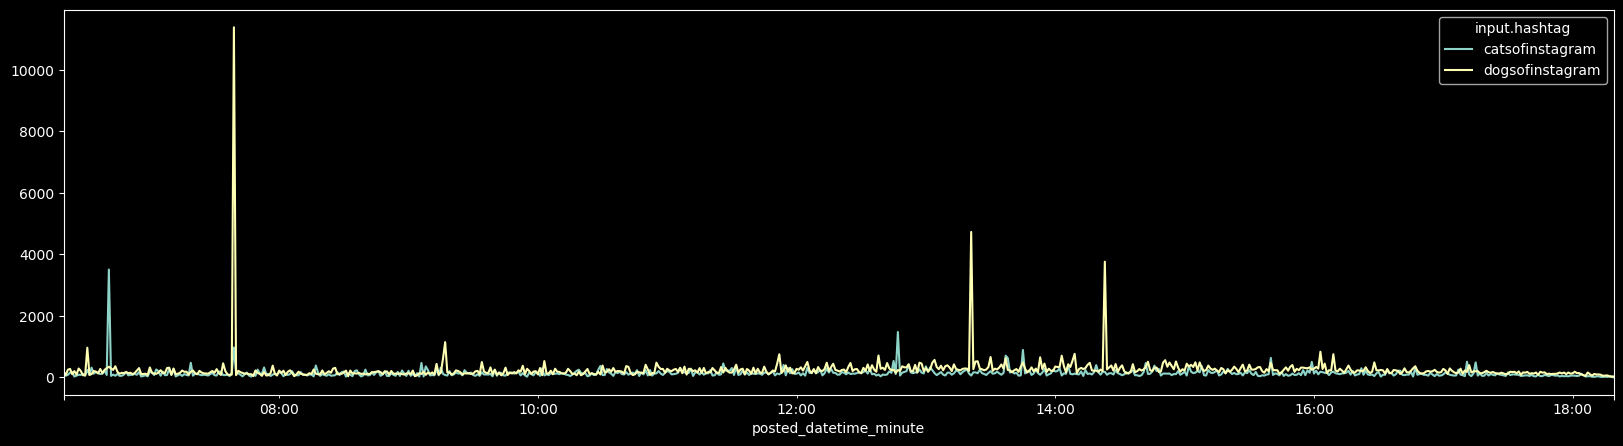

In [59]:
posts \
    .groupby(['input.hashtag', 'posted_datetime_minute']) \
        ['data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_comment.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(kind='line', figsize=(20,5))

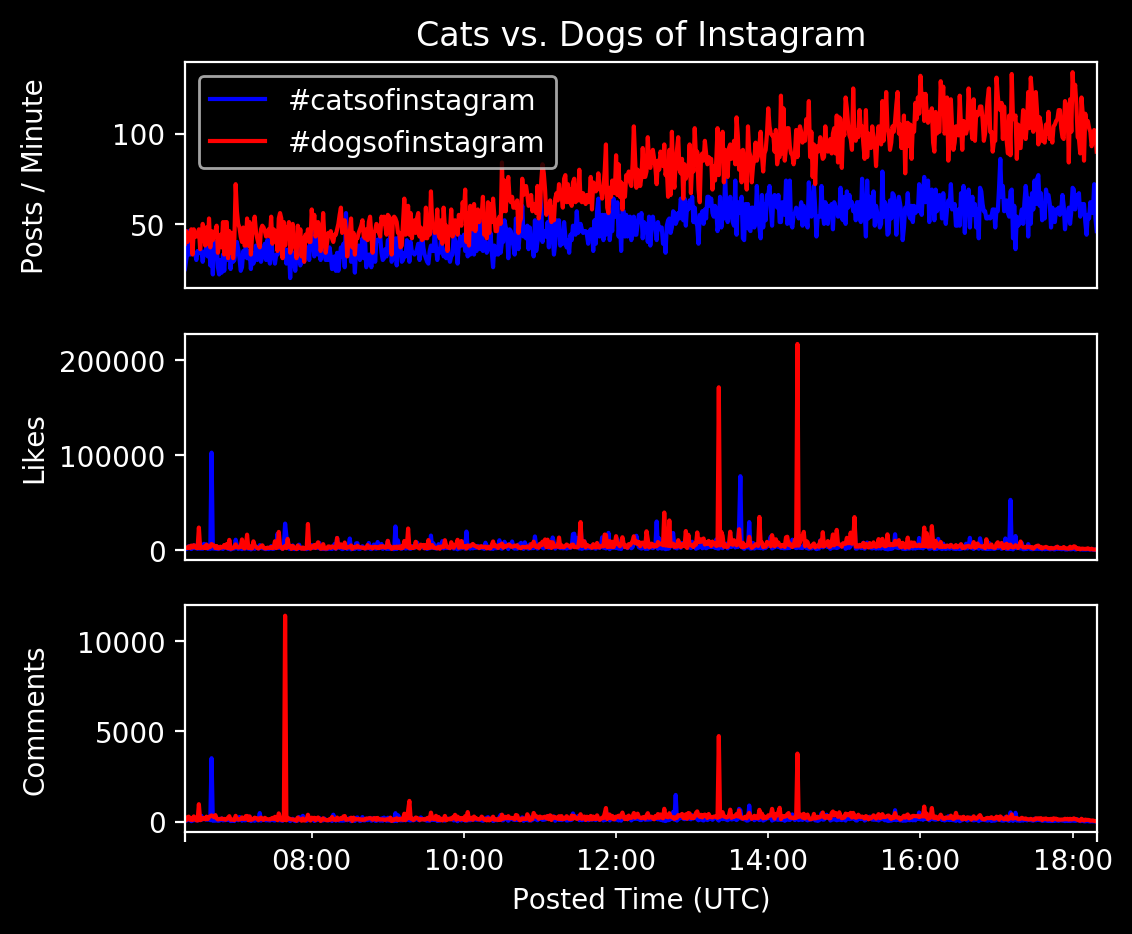

In [62]:
fig = plt.figure(tight_layout=False, figsize=(1, 1), dpi=200)
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0, 2])
ax2 = fig.add_subplot(gs[1, 2])
ax3 = fig.add_subplot(gs[2, 2])

volume_plot = posts \
    .groupby('input.hashtag')['posted_datetime_minute'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(
        title='Cats vs. Dogs of Instagram',
        ax=ax1,
        kind='line',
        figsize=(20,5), 
        color=['blue', 'red'],
    )
volume_plot.set_xlabel('')
volume_plot.set_ylabel('Posts / Minute')
volume_plot.legend(['#catsofinstagram', '#dogsofinstagram'])
volume_plot.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
)

like_plot = posts \
    .groupby(['input.hashtag', 'posted_datetime_minute']) \
        ['data.hashtag.edge_hashtag_to_media.edges.node.edge_liked_by.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(ax=ax2, kind='line', figsize=(20,5), color=['blue', 'red'], legend=False)
like_plot.set_xlabel('')
like_plot.set_ylabel('Likes')
like_plot.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False,
)

comment_plot = posts \
    .groupby(['input.hashtag', 'posted_datetime_minute']) \
        ['data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_comment.count'] \
    .sum() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True)[-721:-1] \
    .plot(ax=ax3, kind='line', figsize=(20,5), color=['blue', 'red'], legend=False)
comment_plot.set_xlabel('Posted Time (UTC)')
comment_plot.set_ylabel('Comments', labelpad=10)

ax1.get_yaxis().set_label_coords(-0.15, 0.5)